In [74]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

Define params and kill function

In [75]:
alpha_1 = 1e2
alpha_2 = 1.2
fk_max = 5
R_k = 0.5
mu = 10
v_1 = 1.2e2
v_2 = 14.4 *1e-1
gammas = [1, 1e-3, 1e-6]
alpha_1_min = 1e-6
alpha_1_max = 1e2

def kill_function(R):
     f = fk_max*(R/(R + R_k))

     return f

Define Model

In [76]:
def model(t, z, gamma, mu, alpha_1):

    dAdt = -alpha_1*(1 - z[1])*z[0]*z[2] + alpha_2*gamma*z[1]*z[2]
    dRdt = (alpha_1/gamma)*(1 - z[1])*z[0] - alpha_2*z[1]
    dSdt = -kill_function(z[1])*z[3]
    dCdt = v_1*((mu/20) - z[3])*(z[2] - z[3]) - v_2*z[3] - kill_function(z[1])*z[3]
    dzdt = [dAdt, dRdt, dSdt, dCdt]

    return dzdt

Sensitivity analysis of kill percentage to alpha_1

In [77]:
alpha_1_array = np.geomspace(alpha_1_min, alpha_1_max, 1000)
gammas = [1, 1e-3, 1e-6]
z0 = [1, 0, 1, 0] 
t = np.arange(0, 1.1, 0.1)
t_span = [0, 1]
Kill_percents = []

# function to extract S values
def solve_for_S(model, gamma, mu, alpha_1):
    z = solve_ivp(model, t_span, z0, args = (gamma, mu, alpha_1), method ='Radau', t_eval = t)
    S = z.y[2]

    return S

# calculate kill percentage
for gamma in gammas:
    sol = []
    for alpha_1 in alpha_1_array:
        S_array = solve_for_S(model, gamma, 10, alpha_1)
        kill_val = 1 - (S_array[-1]/S_array[0])
        sol.append(kill_val)
    Kill_percents.append(sol)

Plot Results

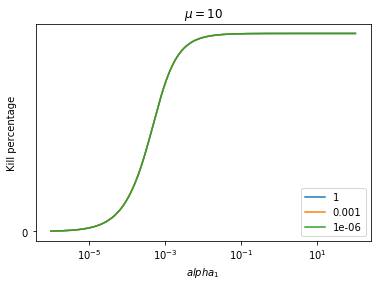

In [85]:
for i in range(len(Kill_percents)):
    vals = Kill_percents[1]
    plt.semilogx(alpha_1_array, vals, label=str(gammas[i]))
    plt.ylabel('Kill percentage')
    plt.xlabel('$ alpha_1 $')
    plt.title('$\mu = 10$')
    plt.legend(loc='lower right')
    plt.yscale('symlog', linthreshy=1000)
plt.show()